In [65]:
# imports

import numpy as np
import pandas as pd
import os

from pandas import DataFrame

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.tools as tls
import matplotlib
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random
import seaborn as sns

%matplotlib inline
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.utils import resample
#import tensorflow as tf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
#Loading companies data into data frame

companies = pd.read_csv('companies.csv')
companies.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


In [67]:
companies.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [68]:
companies.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [69]:
# Drop null records
companies = companies.replace('?', np.nan)
companies = companies.replace('-', np.nan)
companies = companies.dropna()

In [70]:
# check the count of null records
companies[companies.isnull().any(axis=1)].count()

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [71]:
# Drop duplicates
companies.drop_duplicates(subset=None, keep='first', inplace=False)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,closed,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000,operating,GBR,H9,London,London,3,2014-01-28,2014-03-24,2015-02-25
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01


In [72]:
companies["funding_total_usd"] = companies["funding_total_usd"].astype(float)

In [73]:
companies.describe()

,funding_total_usd,funding_rounds
count,3.655200e+04,36552.000000
mean,2.022148e+07,2.088504
std,2.095806e+08,1.603963
min,1.000000e+00,1.000000
25%,3.950000e+05,1.000000
50%,2.025000e+06,2.000000
75%,1.080000e+07,3.000000
max,3.007950e+10,19.000000


In [74]:
# create feature success with 0 or 1. 1 (successful) is in case of IPO or acquired

companies['success'] = companies['status']
companies.loc[companies['status'] == 'ipo', 'success'] = 1
companies.loc[companies['status'] == 'acquired', 'success'] = 1
companies.loc[companies['status'] == 'operating', 'success'] = 0
companies.loc[companies['status'] == 'closed', 'success'] = 0


In [75]:
# funding duration - difference between first and last funding

first = pd.to_datetime(companies.first_funding_at, errors='coerce')
first = pd.to_timedelta(first).dt.days
last = pd.to_datetime(companies.last_funding_at, errors='coerce')
last = pd.to_timedelta(last).dt.days

companies['funding_duration'] = last - first


c:\users\jahmad\appdata\local\programs\python\python37-32\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning:

Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version



In [76]:
#Drop unnecessary features
companies.drop(['permalink','homepage_url','status','country_code','state_code','region','city','founded_at','first_funding_at','last_funding_at'], 'columns', inplace=True)


In [77]:
companies.head()

,name,category_list,funding_total_usd,funding_rounds,success,funding_duration
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,2,0,227.0
3,0-6.com,Curated Web,2000000.0,1,0,0.0
6,Ondine Biomedical Inc.,Biotechnology,762851.0,2,0,101.0
7,H2O.ai,Analytics,33600000.0,4,0,1040.0
8,One Inc.,Mobile,1150050.0,3,0,931.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1A16A8D0>,
      dtype=object)

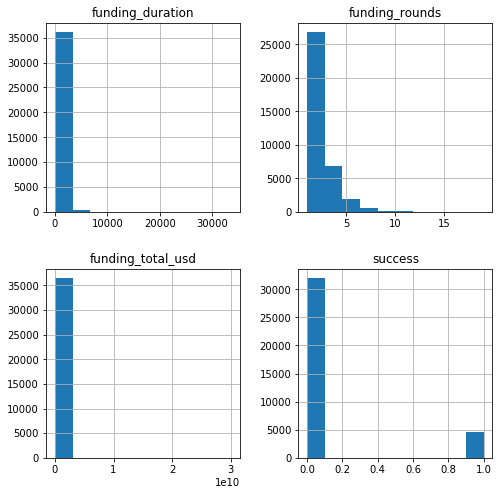

In [78]:
companies.hist(figsize=(8,8))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15560CD0>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15560CD0>,
      dtype=object)

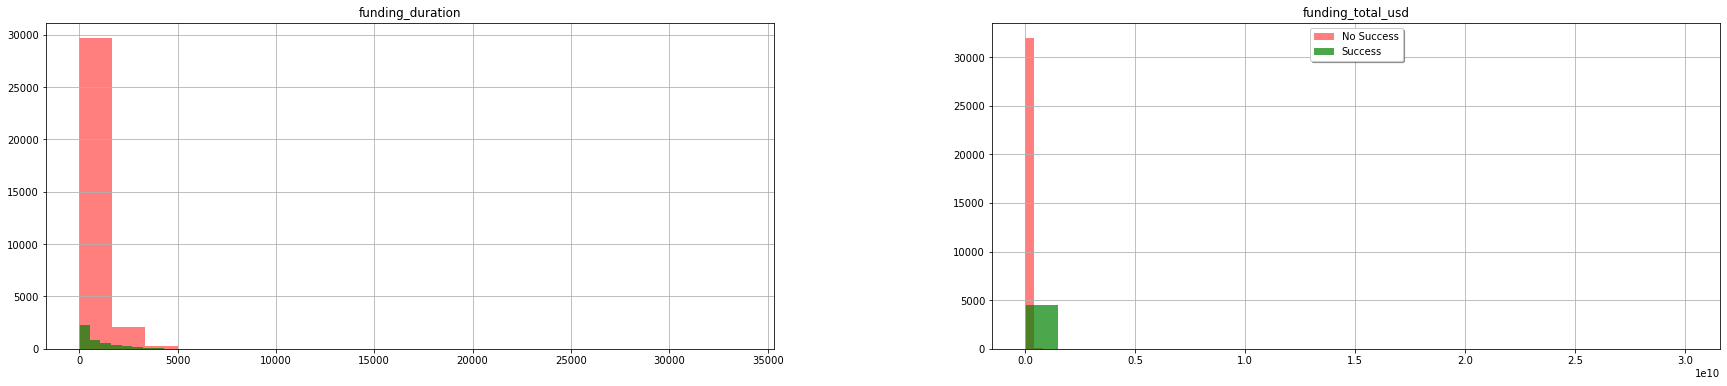

In [79]:
cont_feats_set1 = ['funding_duration','funding_total_usd']
fig, ax = plt.subplots(1, 2, figsize=(30, 6))
companies[companies.success == 0][cont_feats_set1].hist(bins=20, color="red", alpha=0.5, ax=ax)
companies[companies.success == 1][cont_feats_set1].hist(bins=20, color="green", alpha=0.7,ax=ax)
plt.legend(['No Success', 'Success'], shadow=True, loc=9)

In [80]:
bins = [0, 1000, 2000, 5000]
labels = [0, 1, 2]
companies.funding_duration = pd.cut(companies['funding_duration'], include_lowest=True,bins=bins,labels=labels)

bins = [0, 12000000, 50000000]
labels = [0,1]
companies.funding_total_usd = pd.cut(companies['funding_total_usd'],include_lowest=True, bins=bins,labels=labels)

In [81]:
companies=companies.dropna()

In [82]:
companies['funding_total_usd'].value_counts()
companies['success'].value_counts()

0    27958
1     5743
Name: funding_total_usd, dtype: int64

0    30098
1     3603
Name: success, dtype: int64

In [113]:
# fix the imbalanced class issue by upsampling

success0 = companies[companies.success==0]
success1 = companies[companies.success==1]

# upsample minority
success1_upsampled = resample(success1,
replace=True, # sample with replacement
n_samples=len(success0), # match number in majority class
random_state=27)

#combine majority and upsampled minority
upsampled = pd.concat([success0, success1_upsampled])
# check new class counts
upsampled.success.value_counts()

1    30098
0    30098
Name: success, dtype: int64

In [114]:
upsampled[upsampled.isnull().any(axis=1)].count()

name                 0
category_list        0
funding_total_usd    0
funding_rounds       0
success              0
funding_duration     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x191DED30>,
      dtype=object)

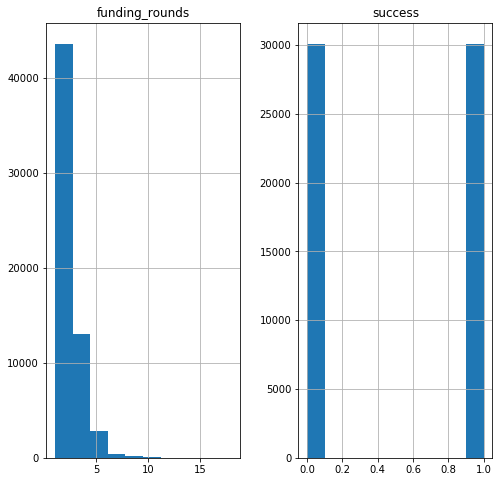

In [115]:
upsampled.hist(figsize=(8,8))
plt.show()

In [116]:
#split dataset in features and target variable
feature_cols = ['funding_total_usd','funding_rounds','funding_duration']
X = upsampled[feature_cols] # Features
y = upsampled.success # Target variable

In [117]:
print(upsampled.dtypes)

name                   object
category_list          object
funding_total_usd    category
funding_rounds          int64
success                 int64
funding_duration     category
dtype: object


In [118]:
from sklearn.ensemble import RandomForestClassifier


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# train model
rfc = RandomForestClassifier(n_estimators=50).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)


In [119]:
print ("\nScores from classification report are:\n")

print(metrics.classification_report(y_test,rfc_pred))


Scores from classification report are:

              precision    recall  f1-score   support

           0       0.60      0.83      0.70      9167
           1       0.71      0.43      0.53      8892

    accuracy                           0.63     18059
   macro avg       0.65      0.63      0.61     18059
weighted avg       0.65      0.63      0.62     18059



In [120]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="gini")
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [121]:
print ("\nScores from classification report are:\n")

print(metrics.classification_report(y_test,y_pred))


Scores from classification report are:

              precision    recall  f1-score   support

           0       0.60      0.83      0.70      9167
           1       0.71      0.43      0.53      8892

    accuracy                           0.63     18059
   macro avg       0.65      0.63      0.61     18059
weighted avg       0.65      0.63      0.62     18059

